In [56]:
!pip install pandas-datareader
!pip install ta --upgrade
!pip install Prophet
!pip install plotly
!pip install notebook
!pip install ipywidgets

import yfinance as yf

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ta #for Bollinger Bands 
from tabulate import tabulate #for SMA and EMA
from pandas_datareader import data as wb #for Prophet
from prophet import Prophet #for Prophet
import plotly.graph_objects as go #for Prophet
from prophet.plot import plot_plotly, plot_components_plotly #for Prophet

import warnings
warnings.filterwarnings("ignore")


In [57]:
# load final clean dataset
df = pd.read_csv('merged_clean_data.csv')

In [58]:
# convert date/time to date time format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# filter data to remove the rows that doesn't have productivity values
df = df[df['Date/Time'] >= '2019-01-01']
df = df[df['Date/Time'] <= '2021-12-31']

# to check date range
print(df['Date/Time'].min())
print(df['Date/Time'].max())

# set date/time as index
df.set_index('Date/Time', inplace = True)

# drop unnecessary columns
sectors_todrop = ['Manufacturing', 'Utilities', 'Educational services', 'Accommodation and food services', 'Other services except public administration',
                  'Public administration', 'Finance and insurance, real estate and rental and leasing', 'Professional scientific and technical services',
                  'Information culture and recreation']

df.drop(columns = sectors_todrop, inplace = True)

# convert 'GeoUID' to string
df['GeoUID'] = df['GeoUID'].astype('str')

# rename columns
df.rename(columns={'Agriculture forestry fishing hunting, Mining quarrying and oil and gas extraction': 'Agriculture'}, inplace=True)


2019-01-01 00:00:00
2021-12-01 00:00:00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14256 entries, 2019-01-01 to 2021-12-01
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   provincename                       14256 non-null  object 
 1   Longitude                          14256 non-null  float64
 2   Latitude                           14256 non-null  float64
 3   Region.Name                        14256 non-null  object 
 4   Construction                       14256 non-null  float64
 5   Transportation and warehousing     14256 non-null  float64
 6   Health care and social assistance  14256 non-null  float64
 7   Agriculture                        14256 non-null  float64
 8   Wholesale trade Retail trade       14256 non-null  float64
 9   Population                         14256 non-null  float64
 10  GeoUID                             14256 non-null  object 
 11  Station Name                       14

1. Alberta

In [60]:
# filter for alberta
df1 = df[df['provincename'] == 'Alberta']

In [61]:
# RESAMPLING THE DATASET TO MONTHLY #

# split data into numeric and string
num_cols = df1.select_dtypes(include = ['number'])

# resample numeric data
df1 = num_cols.resample("M").mean()

print(df1.isnull().sum())

Longitude                            0
Latitude                             0
Construction                         0
Transportation and warehousing       0
Health care and social assistance    0
Agriculture                          0
Wholesale trade Retail trade         0
Population                           0
Mean Max Temp (°C)                   0
Mean Min Temp (°C)                   0
Mean Temp (°C)                       0
Extr Max Temp (°C)                   0
Extr Min Temp (°C)                   0
Total Rain (mm)                      0
Total Snow (cm)                      0
Total Precip (mm)                    0
Snow Grnd Last Day (cm)              0
Dir of Max Gust (10s deg)            0
Spd of Max Gust (km/h)               0
dtype: int64


In [62]:
# 
df1 = df1.reset_index()
df1[['ds','y']]= df1[['Date/Time','Construction']]

#checking changes
df1

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-113.814667,52.139167,150.687690,90.181440,115.832174,573.426399,159.578741,24608.9,-1.469515,...,9.438438,-25.732170,0.221667,4.773333,15.146667,7.800000,20.316667,56.133333,2019-01-31,150.687690
1,2019-02-28,-113.814667,52.139167,159.513727,90.126561,117.169968,571.984815,161.115787,24608.9,-13.087768,...,0.698113,-35.849605,0.056667,5.596667,19.061667,15.333333,17.133333,38.183333,2019-02-28,159.513727
2,2019-03-31,-113.814667,52.139167,156.594041,93.464379,118.330536,566.938530,156.738367,24608.9,3.115363,...,15.970032,-33.291821,0.330000,0.990000,8.525000,3.066667,17.866667,43.533333,2019-03-31,156.594041
3,2019-04-30,-113.814667,52.139167,158.250973,96.969237,107.715029,632.296200,163.213087,24608.9,10.798206,...,19.325792,-9.213440,1.236667,1.753333,15.806667,1.633333,15.416667,52.916667,2019-04-30,158.250973
4,2019-05-31,-113.814667,52.139167,161.115150,92.205425,111.092328,631.417996,163.996354,24608.9,16.137504,...,27.875390,-6.297040,6.576667,1.160000,36.373333,0.066667,18.000000,43.850000,2019-05-31,161.115150
5,2019-06-30,-113.814667,52.139167,168.676202,93.608549,113.894017,660.390559,168.624689,24608.9,20.290959,...,28.007060,0.600539,21.001667,0.016667,76.543333,0.000000,20.116667,49.433333,2019-06-30,168.676202
6,2019-07-31,-113.814667,52.139167,160.387919,90.338778,111.951667,641.581516,167.163957,24608.9,22.468567,...,30.357223,3.959396,24.206667,0.000000,81.341667,0.000000,19.450000,52.766667,2019-07-31,160.387919
7,2019-08-31,-113.814667,52.139167,164.481916,93.293103,116.213034,609.913240,157.633062,24608.9,21.756504,...,29.898910,1.862624,10.688333,0.000000,39.871667,0.000000,19.650000,42.716667,2019-08-31,164.481916
8,2019-09-30,-113.814667,52.139167,166.200398,92.722447,117.033786,612.282950,162.649381,24608.9,16.377783,...,25.793978,-5.181886,10.450000,3.023333,43.183333,4.033333,20.433333,44.816667,2019-09-30,166.200398
9,2019-10-31,-113.814667,52.139167,163.333515,87.682055,118.889382,610.929399,166.526506,24608.9,7.751773,...,17.999773,-17.225533,3.405000,1.993333,19.413333,0.733333,20.866667,59.016667,2019-10-31,163.333515


In [63]:
#to bring in the model the Prophet
model1= df1
model1.head()

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-113.814667,52.139167,150.687690,90.181440,115.832174,573.426399,159.578741,24608.9,-1.469515,...,9.438438,-25.732170,0.221667,4.773333,15.146667,7.800000,20.316667,56.133333,2019-01-31,150.687690
1,2019-02-28,-113.814667,52.139167,159.513727,90.126561,117.169968,571.984815,161.115787,24608.9,-13.087768,...,0.698113,-35.849605,0.056667,5.596667,19.061667,15.333333,17.133333,38.183333,2019-02-28,159.513727
2,2019-03-31,-113.814667,52.139167,156.594041,93.464379,118.330536,566.938530,156.738367,24608.9,3.115363,...,15.970032,-33.291821,0.330000,0.990000,8.525000,3.066667,17.866667,43.533333,2019-03-31,156.594041
3,2019-04-30,-113.814667,52.139167,158.250973,96.969237,107.715029,632.296200,163.213087,24608.9,10.798206,...,19.325792,-9.213440,1.236667,1.753333,15.806667,1.633333,15.416667,52.916667,2019-04-30,158.250973
4,2019-05-31,-113.814667,52.139167,161.115150,92.205425,111.092328,631.417996,163.996354,24608.9,16.137504,...,27.875390,-6.297040,6.576667,1.160000,36.373333,0.066667,18.000000,43.850000,2019-05-31,161.115150


In [64]:
#to drop the unwanted columns in new dataframe
prophet_1 = model1[['ds', 'y']]
prophet_1

,ds,y
0,2019-01-31,150.687690
1,2019-02-28,159.513727
2,2019-03-31,156.594041
3,2019-04-30,158.250973
4,2019-05-31,161.115150
5,2019-06-30,168.676202
6,2019-07-31,160.387919
7,2019-08-31,164.481916
8,2019-09-30,166.200398
9,2019-10-31,163.333515


In [65]:
#to fit the model and the dataframe
m1 = Prophet()
m1.fit(prophet_1)

22:54:24 - cmdstanpy - INFO - Chain [1] start processing
22:54:24 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
#predict the future for next 365 periods (1 year). For the 2022 year
future1 = m1.make_future_dataframe(periods=13, freq='M')
future1.tail()

,ds
44,2022-09-30
45,2022-10-31
46,2022-11-30
47,2022-12-31
48,2023-01-31


In [67]:
#calculate predict method to assign each row in future a predicted value which it names yhat
predictions1= m1.predict(future1)
predictions1[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
44,2022-09-30,165.756887,159.930675,171.222586
45,2022-10-31,163.954893,157.874046,169.718252
46,2022-11-30,162.682196,156.535476,168.234256
47,2022-12-31,161.130660,155.041697,166.913737
48,2023-01-31,147.242636,141.138153,153.695575


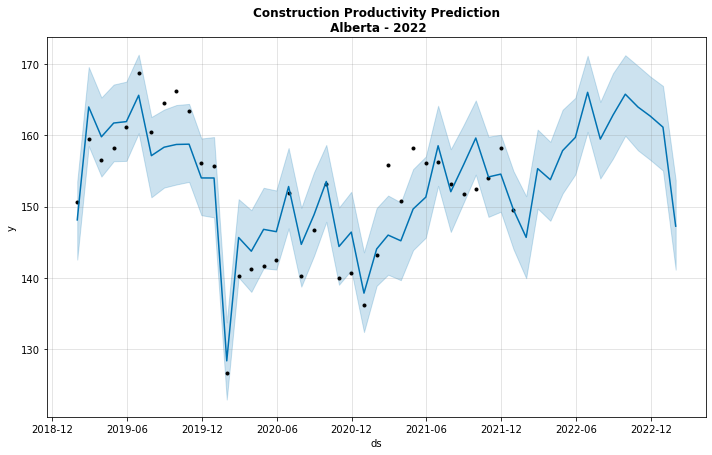

In [68]:
#plot graphs for predictions X axis as time and Y axis as productivity
fig1 = m1.plot(predictions1)
plt.title('Construction Productivity Prediction\n Alberta - 2022', fontweight='bold')
plt.show()

In [69]:
plot_plotly(m1, predictions1)

2.British Columbia

In [70]:
# filter for alberta
df2 = df[df['provincename'] == 'British Columbia']

In [71]:
# RESAMPLING THE DATASET TO MONTHLY #

# split data into numeric and string
num_cols = df2.select_dtypes(include = ['number'])

# resample numeric data
df2 = num_cols.resample("M").mean()

print(df2.isnull().sum())

Longitude                            0
Latitude                             0
Construction                         0
Transportation and warehousing       0
Health care and social assistance    0
Agriculture                          0
Wholesale trade Retail trade         0
Population                           0
Mean Max Temp (°C)                   0
Mean Min Temp (°C)                   0
Mean Temp (°C)                       0
Extr Max Temp (°C)                   0
Extr Min Temp (°C)                   0
Total Rain (mm)                      0
Total Snow (cm)                      0
Total Precip (mm)                    0
Snow Grnd Last Day (cm)              0
Dir of Max Gust (10s deg)            0
Spd of Max Gust (km/h)               0
dtype: int64


In [72]:
# 
df2 = df2.reset_index()
df2[['ds','y']]= df2[['Date/Time','Construction']]

#checking changes
df2

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-123.577254,50.507394,111.944197,81.764054,73.448692,67.303530,99.153020,19964.788732,4.038224,...,9.303654,-8.592891,99.688732,15.661972,150.719718,13.098592,4.570423,21.070423,2019-01-31,111.944197
1,2019-02-28,-123.577254,50.507394,95.808286,75.669917,72.737919,70.306161,97.443457,19964.788732,0.177782,...,7.112304,-16.001445,15.824648,23.305634,50.981690,17.436620,4.225352,21.626761,2019-02-28,95.808286
2,2019-03-31,-123.577254,50.507394,110.902476,79.372903,76.875579,76.195871,101.130199,19964.788732,8.895369,...,17.767660,-11.265050,19.992958,5.439437,32.373944,6.788732,5.091549,16.450704,2019-03-31,110.902476
3,2019-04-30,-123.577254,50.507394,109.534150,85.669256,76.792785,75.663097,97.106469,19964.788732,12.258692,...,18.431634,-1.326941,64.136620,1.794366,87.071127,2.267606,4.718310,20.176056,2019-04-30,109.534150
4,2019-05-31,-123.577254,50.507394,112.795205,87.988476,75.713293,82.205239,100.619660,19964.788732,18.857810,...,26.337051,2.810321,17.826761,0.074648,24.992958,0.000000,5.190141,14.563380,2019-05-31,112.795205
5,2019-06-30,-123.577254,50.507394,109.646892,84.516672,75.880253,75.486850,105.311529,19964.788732,20.349579,...,27.941427,5.216155,28.768310,0.000000,38.726056,0.000000,5.661972,15.239437,2019-06-30,109.646892
6,2019-07-31,-123.577254,50.507394,111.359961,79.713996,77.155331,67.742861,104.599497,19964.788732,22.244961,...,28.210565,8.200197,43.132394,0.000000,58.491549,0.000000,5.063380,14.239437,2019-07-31,111.359961
7,2019-08-31,-123.577254,50.507394,108.740202,79.326798,74.603140,71.544346,107.577552,19964.788732,23.141464,...,29.152858,7.998725,30.895070,0.000000,41.494366,0.000000,4.640845,14.964789,2019-08-31,108.740202
8,2019-09-30,-123.577254,50.507394,105.827102,81.278754,74.914542,69.786146,104.091752,19964.788732,18.098090,...,25.864455,2.797394,78.585211,0.018310,101.949296,0.028169,4.732394,18.119718,2019-09-30,105.827102
9,2019-10-31,-123.577254,50.507394,108.824545,83.084645,75.905401,69.429949,106.517506,19964.788732,10.780126,...,15.808505,-3.316618,81.605634,0.735211,108.436620,0.077465,5.873239,19.338028,2019-10-31,108.824545


In [73]:
#to bring in the model the Prophet
model2= df2
model2.head()

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-123.577254,50.507394,111.944197,81.764054,73.448692,67.303530,99.153020,19964.788732,4.038224,...,9.303654,-8.592891,99.688732,15.661972,150.719718,13.098592,4.570423,21.070423,2019-01-31,111.944197
1,2019-02-28,-123.577254,50.507394,95.808286,75.669917,72.737919,70.306161,97.443457,19964.788732,0.177782,...,7.112304,-16.001445,15.824648,23.305634,50.981690,17.436620,4.225352,21.626761,2019-02-28,95.808286
2,2019-03-31,-123.577254,50.507394,110.902476,79.372903,76.875579,76.195871,101.130199,19964.788732,8.895369,...,17.767660,-11.265050,19.992958,5.439437,32.373944,6.788732,5.091549,16.450704,2019-03-31,110.902476
3,2019-04-30,-123.577254,50.507394,109.534150,85.669256,76.792785,75.663097,97.106469,19964.788732,12.258692,...,18.431634,-1.326941,64.136620,1.794366,87.071127,2.267606,4.718310,20.176056,2019-04-30,109.534150
4,2019-05-31,-123.577254,50.507394,112.795205,87.988476,75.713293,82.205239,100.619660,19964.788732,18.857810,...,26.337051,2.810321,17.826761,0.074648,24.992958,0.000000,5.190141,14.563380,2019-05-31,112.795205


In [74]:
#to drop the unwanted columns in new dataframe
prophet_2 = model2[['ds', 'y']]
prophet_2

,ds,y
0,2019-01-31,111.944197
1,2019-02-28,95.808286
2,2019-03-31,110.902476
3,2019-04-30,109.534150
4,2019-05-31,112.795205
5,2019-06-30,109.646892
6,2019-07-31,111.359961
7,2019-08-31,108.740202
8,2019-09-30,105.827102
9,2019-10-31,108.824545


In [75]:
#to fit the model and the dataframe
m2 = Prophet()
m2.fit(prophet_2)

22:54:25 - cmdstanpy - INFO - Chain [1] start processing
22:54:25 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
#predict the future for next 365 periods (1 year). For the 2022 year
future2 = m2.make_future_dataframe(periods=13, freq='M')
future2.tail()

,ds
44,2022-09-30
45,2022-10-31
46,2022-11-30
47,2022-12-31
48,2023-01-31


In [77]:
#calculate predict method to assign each row in future a predicted value which it names yhat
predictions2= m2.predict(future2)
predictions2[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
44,2022-09-30,115.510197,111.458296,119.344459
45,2022-10-31,118.061009,114.115773,121.915621
46,2022-11-30,117.881805,114.253304,121.646002
47,2022-12-31,122.560804,118.667455,126.357734
48,2023-01-31,128.825201,124.950934,132.803506


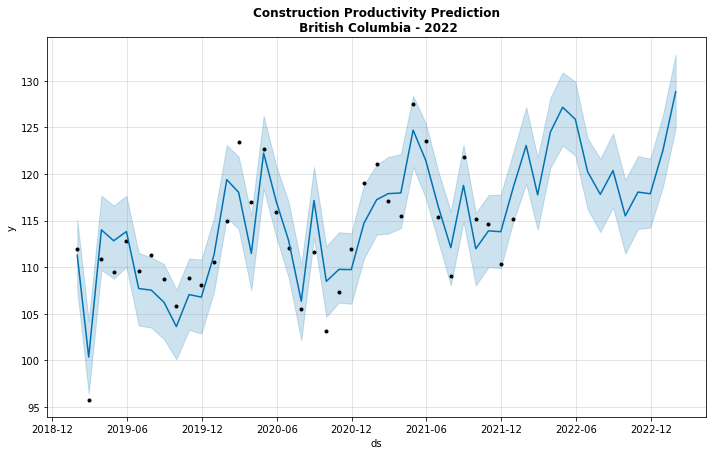

In [78]:
#plot graphs for predictions X axis as time and Y axis as productivity
fig2 = m2.plot(predictions2)
plt.title('Construction Productivity Prediction\n British Columbia - 2022', fontweight='bold')
plt.show()

In [79]:
plot_plotly(m2, predictions2)

3.Quebec

In [80]:
# filter for Quebec
df3 = df[df['provincename'] == 'Quebec']

In [81]:
# RESAMPLING THE DATASET TO MONTHLY #

# split data into numeric and string
num_cols = df3.select_dtypes(include = ['number'])

# resample numeric data
df3 = num_cols.resample("M").mean()

print(df3.isnull().sum())

Longitude                            0
Latitude                             0
Construction                         0
Transportation and warehousing       0
Health care and social assistance    0
Agriculture                          0
Wholesale trade Retail trade         0
Population                           0
Mean Max Temp (°C)                   0
Mean Min Temp (°C)                   0
Mean Temp (°C)                       0
Extr Max Temp (°C)                   0
Extr Min Temp (°C)                   0
Total Rain (mm)                      0
Total Snow (cm)                      0
Total Precip (mm)                    0
Snow Grnd Last Day (cm)              0
Dir of Max Gust (10s deg)            0
Spd of Max Gust (km/h)               0
dtype: int64


In [82]:
# 
df3 = df3.reset_index()
df3[['ds','y']]= df3[['Date/Time','Construction']]

#checking changes
df3

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-72.562791,46.336395,92.169830,45.598358,115.526675,40.147025,144.456612,28921.988372,-7.094990,...,3.313532,-28.713466,9.288372,71.669767,80.365116,47.302326,0.546512,3.174419,2019-01-31,92.169830
1,2019-02-28,-72.562791,46.336395,88.616090,45.532207,115.392542,39.714605,143.140206,28921.988372,-4.654027,...,5.517908,-28.564328,9.432558,50.554651,59.470930,56.918605,0.976744,4.244186,2019-02-28,88.616090
2,2019-03-31,-72.562791,46.336395,87.939527,45.291225,115.179939,44.564837,143.583463,28921.988372,0.871308,...,10.273284,-25.444611,20.258140,26.744186,45.416279,32.186047,1.069767,2.965116,2019-03-31,87.939527
3,2019-04-30,-72.562791,46.336395,90.123995,45.745132,115.739341,41.775323,155.548771,28921.988372,7.715740,...,17.823232,-11.584958,79.165116,15.856977,95.486047,1.651163,1.279070,3.290698,2019-04-30,90.123995
4,2019-05-31,-72.562791,46.336395,89.720047,46.398345,115.389530,38.224368,144.105068,28921.988372,17.437344,...,27.203904,-2.234724,1.016279,0.000000,3.438372,0.000000,0.709302,2.093023,2019-05-31,89.720047
5,2019-06-30,-72.562791,46.336395,95.366710,45.103371,116.691771,39.674484,144.546318,28921.988372,22.206423,...,29.856088,2.010841,83.118605,0.034884,86.310465,0.000000,1.372093,3.406977,2019-06-30,95.366710
6,2019-07-31,-72.562791,46.336395,103.845663,48.218853,122.884266,39.257801,145.165071,28921.988372,27.075106,...,32.166409,7.860678,53.426744,0.000000,54.952326,0.000000,1.209302,2.581395,2019-07-31,103.845663
7,2019-08-31,-72.562791,46.336395,94.336914,48.700624,116.186715,41.208808,140.732654,28921.988372,24.270824,...,29.214356,6.092528,62.569767,0.000000,64.048837,0.000000,1.232558,2.383721,2019-08-31,94.336914
8,2019-09-30,-72.562791,46.336395,96.133364,46.804096,115.355742,40.312557,141.189796,28921.988372,18.676255,...,25.789985,0.274266,73.756977,0.000000,76.394186,0.000000,1.162791,2.534884,2019-09-30,96.133364
9,2019-10-31,-72.562791,46.336395,90.012868,47.084904,118.291212,34.550464,141.361710,28921.988372,12.642896,...,19.134726,-3.094558,124.182558,0.155814,127.595349,0.000000,0.465116,2.558140,2019-10-31,90.012868


In [83]:
#to bring in the model the Prophet
model3= df3
model3.head()

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-72.562791,46.336395,92.169830,45.598358,115.526675,40.147025,144.456612,28921.988372,-7.094990,...,3.313532,-28.713466,9.288372,71.669767,80.365116,47.302326,0.546512,3.174419,2019-01-31,92.169830
1,2019-02-28,-72.562791,46.336395,88.616090,45.532207,115.392542,39.714605,143.140206,28921.988372,-4.654027,...,5.517908,-28.564328,9.432558,50.554651,59.470930,56.918605,0.976744,4.244186,2019-02-28,88.616090
2,2019-03-31,-72.562791,46.336395,87.939527,45.291225,115.179939,44.564837,143.583463,28921.988372,0.871308,...,10.273284,-25.444611,20.258140,26.744186,45.416279,32.186047,1.069767,2.965116,2019-03-31,87.939527
3,2019-04-30,-72.562791,46.336395,90.123995,45.745132,115.739341,41.775323,155.548771,28921.988372,7.715740,...,17.823232,-11.584958,79.165116,15.856977,95.486047,1.651163,1.279070,3.290698,2019-04-30,90.123995
4,2019-05-31,-72.562791,46.336395,89.720047,46.398345,115.389530,38.224368,144.105068,28921.988372,17.437344,...,27.203904,-2.234724,1.016279,0.000000,3.438372,0.000000,0.709302,2.093023,2019-05-31,89.720047


In [84]:
#to drop the unwanted columns in new dataframe
prophet_3 = model3[['ds', 'y']]
prophet_3

,ds,y
0,2019-01-31,92.169830
1,2019-02-28,88.616090
2,2019-03-31,87.939527
3,2019-04-30,90.123995
4,2019-05-31,89.720047
5,2019-06-30,95.366710
6,2019-07-31,103.845663
7,2019-08-31,94.336914
8,2019-09-30,96.133364
9,2019-10-31,90.012868


In [85]:
#to fit the model and the dataframe
m3 = Prophet()
m3.fit(prophet_3)

22:54:26 - cmdstanpy - INFO - Chain [1] start processing
22:54:26 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
#predict the future for next 365 periods (1 year). For the 2022 year
future3 = m3.make_future_dataframe(periods=13, freq='M')
future3.tail()

,ds
44,2022-09-30
45,2022-10-31
46,2022-11-30
47,2022-12-31
48,2023-01-31


In [87]:
#calculate predict method to assign each row in future a predicted value which it names yhat
predictions3= m3.predict(future3)
predictions3[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
44,2022-09-30,100.340376,90.191032,110.555235
45,2022-10-31,98.157976,87.970654,107.881149
46,2022-11-30,100.382624,90.253180,109.765523
47,2022-12-31,102.735033,92.860736,113.207876
48,2023-01-31,104.570662,94.725129,114.523438


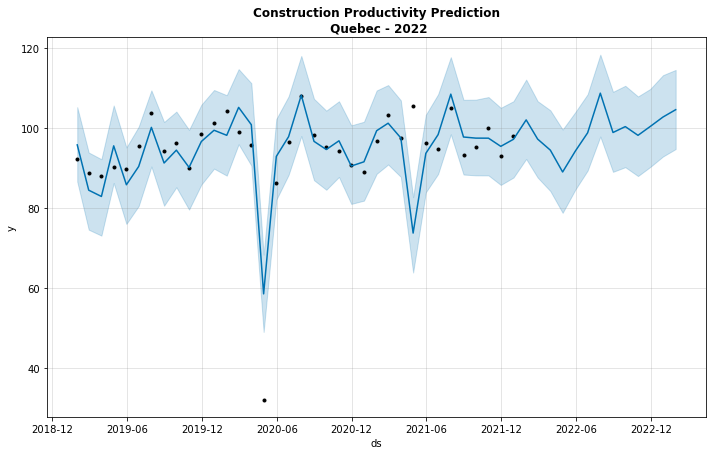

In [88]:
#plot graphs for predictions X axis as time and Y axis as productivity
fig3 = m3.plot(predictions3)
plt.title('Construction Productivity Prediction\n Quebec - 2022', fontweight='bold')
plt.show()

In [89]:
plot_plotly(m3, predictions3)

4.Ontario

In [90]:
# filter for ontario
df4 = df[df['provincename'] == 'Ontario']

In [91]:
# RESAMPLING THE DATASET TO MONTHLY #

# split data into numeric and string
num_cols = df4.select_dtypes(include = ['number'])

# resample numeric data
df4 = num_cols.resample("M").mean()

print(df4.isnull().sum())

Longitude                            0
Latitude                             0
Construction                         0
Transportation and warehousing       0
Health care and social assistance    0
Agriculture                          0
Wholesale trade Retail trade         0
Population                           0
Mean Max Temp (°C)                   0
Mean Min Temp (°C)                   0
Mean Temp (°C)                       0
Extr Max Temp (°C)                   0
Extr Min Temp (°C)                   0
Total Rain (mm)                      0
Total Snow (cm)                      0
Total Precip (mm)                    0
Snow Grnd Last Day (cm)              0
Dir of Max Gust (10s deg)            0
Spd of Max Gust (km/h)               0
dtype: int64


In [92]:
# 
df4 = df4.reset_index()
df4[['ds','y']]= df4[['Date/Time','Construction']]

#checking changes
df4

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-80.717586,45.14,291.270723,187.349267,330.965870,65.454735,541.344049,89364.844828,-5.815025,...,5.542479,-28.582036,10.700000,35.250000,57.467241,23.793103,7.344828,17.103448,2019-01-31,291.270723
1,2019-02-28,-80.717586,45.14,307.849870,187.653781,331.723815,62.380591,543.867911,89364.844828,-3.195734,...,7.216208,-25.990211,17.667241,27.887931,60.708621,26.758621,8.017241,19.982759,2019-02-28,307.849870
2,2019-03-31,-80.717586,45.14,297.860778,187.384606,324.336762,67.623066,557.171622,89364.844828,1.431922,...,11.175895,-22.498436,25.082759,11.565517,47.925862,15.603448,7.241379,17.293103,2019-03-31,297.860778
3,2019-04-30,-80.717586,45.14,293.621619,183.816006,331.267377,64.123081,534.365823,89364.844828,9.332061,...,18.920655,-9.824249,64.127586,2.955172,88.986207,0.879310,7.396552,16.827586,2019-04-30,293.621619
4,2019-05-31,-80.717586,45.14,299.311460,194.509932,335.969603,67.419826,539.864683,89364.844828,15.873691,...,24.942544,-0.760731,63.989655,0.196552,80.146552,0.000000,6.827586,16.431034,2019-05-31,299.311460
5,2019-06-30,-80.717586,45.14,297.111401,197.798740,336.284766,71.315237,536.352810,89364.844828,22.262516,...,29.546958,3.624695,58.158621,0.000000,73.758621,0.000000,6.793103,15.500000,2019-06-30,297.111401
6,2019-07-31,-80.717586,45.14,300.129300,195.213727,328.871902,71.743141,545.961488,89364.844828,27.028624,...,31.934675,9.374454,49.751724,0.000000,67.806897,0.000000,6.310345,17.258621,2019-07-31,300.129300
7,2019-08-31,-80.717586,45.14,305.955777,187.963166,341.800876,74.579166,545.396889,89364.844828,24.799222,...,29.550597,7.625128,45.536207,0.000000,59.174138,0.000000,7.689655,16.500000,2019-08-31,305.955777
8,2019-09-30,-80.717586,45.14,307.664694,188.663602,342.573950,75.063547,553.291544,89364.844828,20.637729,...,28.029625,3.565291,52.355172,0.000000,67.124138,0.000000,5.965517,15.482759,2019-09-30,307.664694
9,2019-10-31,-80.717586,45.14,315.699554,194.467545,335.049652,76.850682,536.102901,89364.844828,13.340672,...,24.286391,-2.561654,87.436207,0.937931,105.367241,0.034483,6.500000,18.362069,2019-10-31,315.699554


In [93]:
#to bring in the model the Prophet
model4= df4
model4.head()

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-80.717586,45.14,291.270723,187.349267,330.965870,65.454735,541.344049,89364.844828,-5.815025,...,5.542479,-28.582036,10.700000,35.250000,57.467241,23.793103,7.344828,17.103448,2019-01-31,291.270723
1,2019-02-28,-80.717586,45.14,307.849870,187.653781,331.723815,62.380591,543.867911,89364.844828,-3.195734,...,7.216208,-25.990211,17.667241,27.887931,60.708621,26.758621,8.017241,19.982759,2019-02-28,307.849870
2,2019-03-31,-80.717586,45.14,297.860778,187.384606,324.336762,67.623066,557.171622,89364.844828,1.431922,...,11.175895,-22.498436,25.082759,11.565517,47.925862,15.603448,7.241379,17.293103,2019-03-31,297.860778
3,2019-04-30,-80.717586,45.14,293.621619,183.816006,331.267377,64.123081,534.365823,89364.844828,9.332061,...,18.920655,-9.824249,64.127586,2.955172,88.986207,0.879310,7.396552,16.827586,2019-04-30,293.621619
4,2019-05-31,-80.717586,45.14,299.311460,194.509932,335.969603,67.419826,539.864683,89364.844828,15.873691,...,24.942544,-0.760731,63.989655,0.196552,80.146552,0.000000,6.827586,16.431034,2019-05-31,299.311460


In [94]:
#to drop the unwanted columns in new dataframe
prophet_4 = model4[['ds', 'y']]
prophet_4

,ds,y
0,2019-01-31,291.270723
1,2019-02-28,307.849870
2,2019-03-31,297.860778
3,2019-04-30,293.621619
4,2019-05-31,299.311460
5,2019-06-30,297.111401
6,2019-07-31,300.129300
7,2019-08-31,305.955777
8,2019-09-30,307.664694
9,2019-10-31,315.699554


In [95]:
#to fit the model and the dataframe
m4 = Prophet()
m4.fit(prophet_4)

22:54:27 - cmdstanpy - INFO - Chain [1] start processing
22:54:27 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
#predict the future for next 365 periods (1 year). For the 2022 year
future4 = m4.make_future_dataframe(periods=13, freq='M')
future4.tail()

,ds
44,2022-09-30
45,2022-10-31
46,2022-11-30
47,2022-12-31
48,2023-01-31


In [97]:
#calculate predict method to assign each row in future a predicted value which it names yhat
predictions4= m4.predict(future4)
predictions4[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
44,2022-09-30,347.226213,335.119750,359.157667
45,2022-10-31,355.960075,343.310460,368.249285
46,2022-11-30,357.602856,345.931631,370.802547
47,2022-12-31,354.467798,341.570442,368.168388
48,2023-01-31,364.027572,350.850265,376.165146


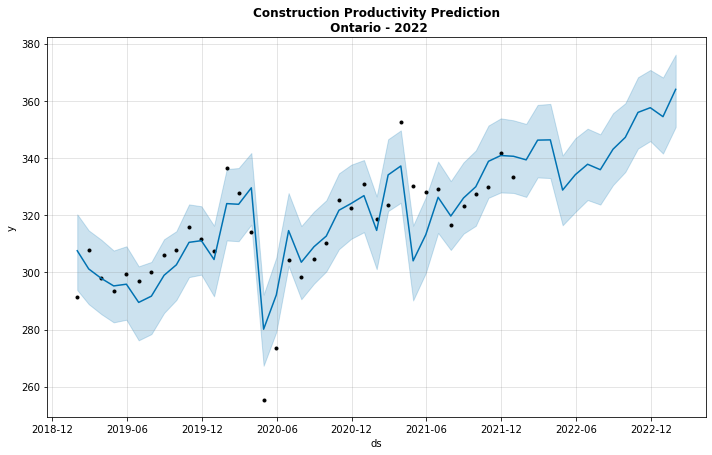

In [98]:
#plot graphs for predictions X axis as time and Y axis as productivity
fig4 = m4.plot(predictions4)
plt.title('Construction Productivity Prediction\n Ontario - 2022', fontweight='bold')
plt.show()

In [99]:
plot_plotly(m4, predictions4)

5.Saskatchewan

In [100]:
# filter for british
df5 = df[df['provincename'] == 'Saskatchewan']

In [101]:
# RESAMPLING THE DATASET TO MONTHLY #

# split data into numeric and string
num_cols = df5.select_dtypes(include = ['number'])

# resample numeric data
df5 = num_cols.resample("M").mean()

print(df5.isnull().sum())

Longitude                            0
Latitude                             0
Construction                         0
Transportation and warehousing       0
Health care and social assistance    0
Agriculture                          0
Wholesale trade Retail trade         0
Population                           0
Mean Max Temp (°C)                   0
Mean Min Temp (°C)                   0
Mean Temp (°C)                       0
Extr Max Temp (°C)                   0
Extr Min Temp (°C)                   0
Total Rain (mm)                      0
Total Snow (cm)                      0
Total Precip (mm)                    0
Snow Grnd Last Day (cm)              0
Dir of Max Gust (10s deg)            0
Spd of Max Gust (km/h)               0
dtype: int64


In [102]:
# 
df5 = df5.reset_index()
df5[['ds','y']]= df5[['Date/Time','Construction']]

#checking changes
df5

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-105.9848,51.7412,3.057667,2.920892,2.521574,52.845917,3.157323,724.98,-7.942945,...,4.278850,-33.215441,0.072,4.064,11.956,10.86,19.28,43.78,2019-01-31,3.057667
1,2019-02-28,-105.9848,51.7412,3.097304,2.778399,2.636981,52.400057,3.229690,724.98,-17.150609,...,-4.944132,-39.239763,0.000,4.716,13.538,17.92,17.30,34.00,2019-02-28,3.097304
2,2019-03-31,-105.9848,51.7412,3.167423,2.826190,2.568337,50.276415,3.161971,724.98,0.048917,...,13.868019,-31.775093,0.044,0.672,2.042,2.84,15.90,34.34,2019-03-31,3.167423
3,2019-04-30,-105.9848,51.7412,3.092867,2.595833,2.585508,53.209994,3.168498,724.98,10.772358,...,21.769980,-11.766064,3.100,2.144,17.896,2.26,14.76,42.24,2019-04-30,3.092867
4,2019-05-31,-105.9848,51.7412,3.017996,2.413314,2.465828,51.950983,3.139810,724.98,16.620898,...,30.040234,-8.543632,3.144,1.732,15.228,0.00,16.24,39.04,2019-05-31,3.017996
5,2019-06-30,-105.9848,51.7412,2.871310,2.429466,2.449008,50.247326,3.262190,724.98,22.037077,...,31.585648,1.477764,34.390,0.000,90.406,0.00,14.72,41.80,2019-06-30,2.871310
6,2019-07-31,-105.9848,51.7412,2.909807,2.701662,2.482044,48.037765,3.226915,724.98,24.212628,...,31.527112,4.280183,23.102,0.000,58.938,0.00,16.02,43.40,2019-07-31,2.909807
7,2019-08-31,-105.9848,51.7412,3.009436,2.636994,2.459701,50.587781,3.149521,724.98,22.541033,...,31.765346,2.841574,24.176,0.000,57.276,0.00,16.54,38.18,2019-08-31,3.009436
8,2019-09-30,-105.9848,51.7412,2.987698,2.644241,2.554151,54.752438,3.091750,724.98,17.285911,...,29.647183,-1.854175,26.470,2.696,69.732,1.76,12.94,37.10,2019-09-30,2.987698
9,2019-10-31,-105.9848,51.7412,2.807866,2.705588,2.574039,61.581517,2.993026,724.98,6.840057,...,18.652485,-16.171759,1.484,3.712,13.450,2.12,17.96,42.90,2019-10-31,2.807866


In [103]:
#to bring in the model the Prophet
model5= df5
model5.head()

,Date/Time,Longitude,Latitude,Construction,Transportation and warehousing,Health care and social assistance,Agriculture,Wholesale trade Retail trade,Population,Mean Max Temp (°C),...,Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),ds,y
0,2019-01-31,-105.9848,51.7412,3.057667,2.920892,2.521574,52.845917,3.157323,724.98,-7.942945,...,4.278850,-33.215441,0.072,4.064,11.956,10.86,19.28,43.78,2019-01-31,3.057667
1,2019-02-28,-105.9848,51.7412,3.097304,2.778399,2.636981,52.400057,3.229690,724.98,-17.150609,...,-4.944132,-39.239763,0.000,4.716,13.538,17.92,17.30,34.00,2019-02-28,3.097304
2,2019-03-31,-105.9848,51.7412,3.167423,2.826190,2.568337,50.276415,3.161971,724.98,0.048917,...,13.868019,-31.775093,0.044,0.672,2.042,2.84,15.90,34.34,2019-03-31,3.167423
3,2019-04-30,-105.9848,51.7412,3.092867,2.595833,2.585508,53.209994,3.168498,724.98,10.772358,...,21.769980,-11.766064,3.100,2.144,17.896,2.26,14.76,42.24,2019-04-30,3.092867
4,2019-05-31,-105.9848,51.7412,3.017996,2.413314,2.465828,51.950983,3.139810,724.98,16.620898,...,30.040234,-8.543632,3.144,1.732,15.228,0.00,16.24,39.04,2019-05-31,3.017996


In [104]:
#to drop the unwanted columns in new dataframe
prophet_5 = model5[['ds', 'y']]
prophet_5

,ds,y
0,2019-01-31,3.057667
1,2019-02-28,3.097304
2,2019-03-31,3.167423
3,2019-04-30,3.092867
4,2019-05-31,3.017996
5,2019-06-30,2.871310
6,2019-07-31,2.909807
7,2019-08-31,3.009436
8,2019-09-30,2.987698
9,2019-10-31,2.807866


In [105]:
#to fit the model and the dataframe
m5 = Prophet()
m5.fit(prophet_5)

22:54:27 - cmdstanpy - INFO - Chain [1] start processing
22:54:28 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
#predict the future for next 365 periods (1 year). For the 2022 year
future5 = m5.make_future_dataframe(periods=13, freq='M')
future5.tail()

,ds
44,2022-09-30
45,2022-10-31
46,2022-11-30
47,2022-12-31
48,2023-01-31


In [107]:
#calculate predict method to assign each row in future a predicted value which it names yhat
predictions5= m5.predict(future5)
predictions5[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
44,2022-09-30,2.449960,2.334098,2.550770
45,2022-10-31,2.358708,2.252132,2.469282
46,2022-11-30,2.407117,2.292763,2.517743
47,2022-12-31,2.423502,2.310089,2.544086
48,2023-01-31,2.150122,2.040467,2.260181


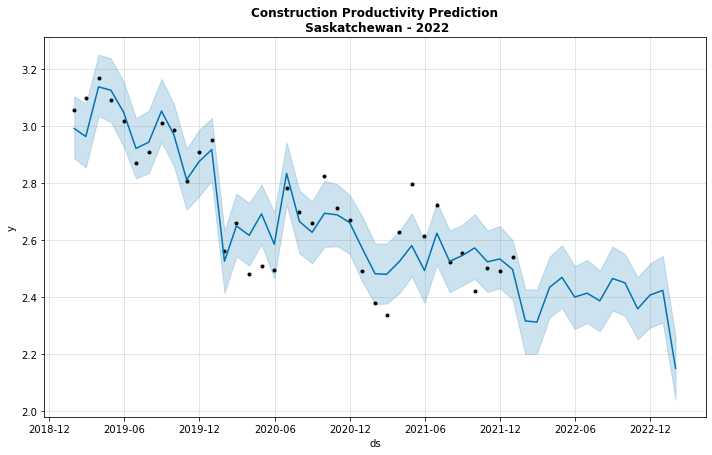

In [108]:
#plot graphs for predictions X axis as time and Y axis as productivity
fig5 = m5.plot(predictions5)
plt.title('Construction Productivity Prediction\n Saskatchewan - 2022', fontweight='bold')
plt.show()

In [109]:
plot_plotly(m5, predictions5)